<a href="https://colab.research.google.com/github/elimart12/-CRUD_Terminal_MySQL/blob/main/Copia_de_Examen_IA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("piterfm/olympic-games-medals-19862018")

print("Path to dataset files:", path)

100%|██████████| 13.9M/13.9M [00:00<00:00, 103MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/piterfm/olympic-games-medals-19862018/versions/9


In [ ]:
import pandas as pd

# Ruta al dataset descargado
base_path = "/root/.cache/kagglehub/datasets/piterfm/olympic-games-medals-19862018/versions/9"

# Carga de los CSV
medals_df = pd.read_csv(f"{base_path}/olympic_medals.csv")
results_df = pd.read_csv(f"{base_path}/olympic_results.csv")

# Vista previa
medals_df.head()


,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [ ]:
# Cantidad de datos nulos en cada dataset
print("Nulos en olympic_medals.csv:")
print(medals_df.isnull().sum())

print("\nNulos en olympic_results.csv:")
print(results_df.isnull().sum())


Nulos en olympic_medals.csv:
discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
dtype: int64

Nulos en olympic_results.csv:
discipline_title              0
event_title                   0
slug_game                     0
participant_type              0
medal_type               142598
athletes                 154828
rank_equal               130278
rank_position              3878
country_name                  0
country_code               5036
country_3_letter_code         0
athlete_url               32813
athlete_full_name         21158
value_unit                84158
value_type                72755
dtype: int64


In [ ]:
(medals_df.isnull().sum() / len(medals_df)) * 100


,0
discipline_title,0.000000
slug_game,0.000000
event_title,0.000000
event_gender,0.000000
medal_type,0.000000
participant_type,0.000000
participant_title,69.654791
athlete_url,21.523713
athlete_full_name,16.702770
country_name,0.000000


In [ ]:
# Estadísticas básicas
medals_df.describe(include='all')  # incluye texto también
results_df.describe()


,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
count,162804,162804,162804,162804,20206,7976,32526,158926,162804,157768,162804,129991,141646,78646,90049
unique,86,1567,53,2,3,6845,2,193,238,213,233,68104,75263,46475,12
top,Athletics,individual mixed,rio-2016,Athlete,BRONZE,"[('LETOT LETOT', 'https://olympics.com/en/athl...",True,9,United States of America,US,USA,https://olympics.com/en/athletes/heikki-savola...,Heikki SAVOLAINEN,same time,TIME
freq,19259,2731,7672,141646,7029,37,23613,8279,11916,11916,11916,34,34,99,43774


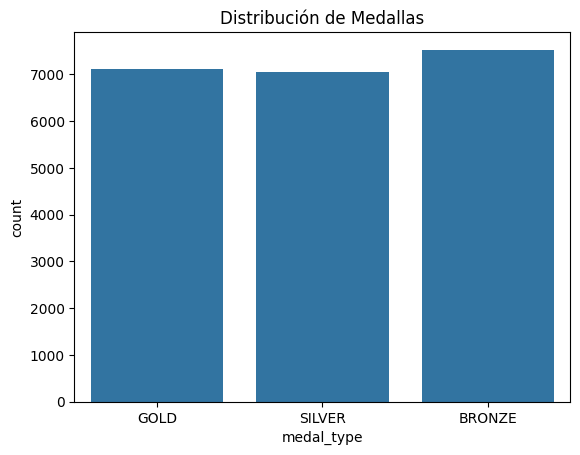

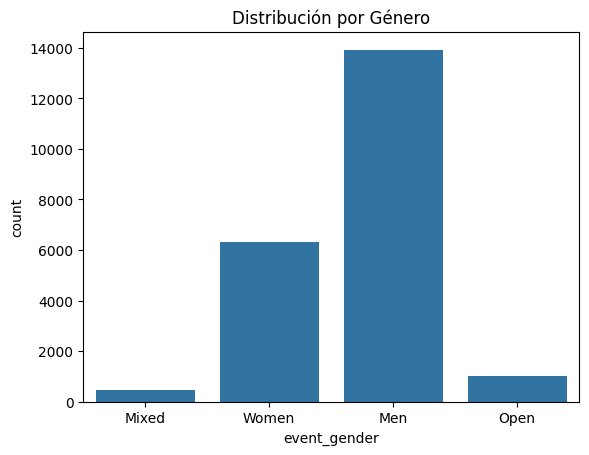

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de tipos de medallas
sns.countplot(data=medals_df, x='medal_type', order=['GOLD', 'SILVER', 'BRONZE'])
plt.title('Distribución de Medallas')
plt.show()

# Distribución de eventos por género
sns.countplot(data=medals_df, x='event_gender')
plt.title('Distribución por Género')
plt.show()


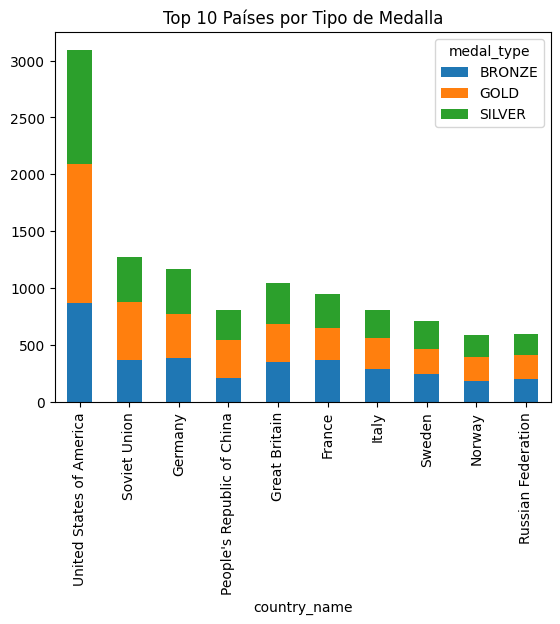

In [ ]:
medals_pivot = medals_df.pivot_table(index='country_name', columns='medal_type', aggfunc='size', fill_value=0)
medals_pivot.sort_values(by='GOLD', ascending=False).head(10).plot(kind='bar', stacked=True)
plt.title('Top 10 Países por Tipo de Medalla')
plt.show()


In [ ]:
# 1. ¿Qué país ganó más medallas?
print(medals_df['country_name'].value_counts().head(1))

country_name
United States of America    3094
Name: count, dtype: int64


In [ ]:
# 2. ¿Cuál es el deporte más premiado?
print(medals_df['discipline_title'].value_counts().head(1))

discipline_title
Athletics    3080
Name: count, dtype: int64


In [ ]:
# 3. ¿Cuál es el evento con más medallas?
print(medals_df['event_title'].value_counts().head(1))

event_title
Individual men    215
Name: count, dtype: int64


In [ ]:
# 4. ¿Cuál es el año con más medallas?
print(medals_df['slug_game'].value_counts().head(1))


slug_game
tokyo-2020    1188
Name: count, dtype: int64


In [ ]:
# 5. ¿Cuál atleta tiene más medallas?
print(medals_df['athlete_full_name'].value_counts().head(1))

athlete_full_name
Michael PHELPS    16
Name: count, dtype: int64


In [ ]:
# 6. ¿Qué género tiene más medallas?
print(medals_df['event_gender'].value_counts())

event_gender
Men      13932
Women     6323
Open       998
Mixed      444
Name: count, dtype: int64


In [ ]:
# 7. ¿Qué país domina la natación?
swimming = medals_df[medals_df['discipline_title'] == 'Swimming']
print(swimming['country_name'].value_counts().head(1))


country_name
United States of America    581
Name: count, dtype: int64


In [ ]:
# 8. ¿Cuántas medallas ganó USA?
usa = medals_df[medals_df['country_name'] == 'United States of America']
print(len(usa))

3094


In [ ]:
# 9. ¿Qué país ganó más medallas de oro?
print(medals_df[medals_df['medal_type'] == 'GOLD']['country_name'].value_counts().head(1))


country_name
United States of America    1222
Name: count, dtype: int64


In [ ]:
# 10. ¿Cuántos eventos mixtos hay?
print(len(medals_df[medals_df['event_gender'] == 'Mixed']))

444
